### Assignment 1.
#### Assignment 1-1.
- 동일가중 수익률 지수는 다음과 같이 표현됩니다

$$\mathbf{Index} = \int_{t=1}^k \Big(\sum_{i=1}^n \frac{1}{n}r_{i,t}\Big)$$

- 여기서 $n$은 기업의 수를 나타냅니다
- 기호 $\int_{t=1}^k$는 k기간까지의 **누적합을 의미합니다**
- 누적합은 `numpy.cumsum()` 함수를 통해 구현 가능합니다
- KOSPI 상장 기업 중 10개의 기업을 선정하여 2015년 1월 1일부터 2023년 2월 23일까지의 동일가중 수익률 Index를 제작한 뒤, DataFrame 혹은 Series에 저장하세요

In [35]:
import seaborn as sns
import numpy as np, pandas as pd, matplotlib.pyplot as plt

import pandas_datareader as wb
import datetime

ticker = ['005930','028260','000660','068270','051910',
          '006400','005380','035420','000270','005490']
df = pd.DataFrame()
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2023, 2, 17)
for i in ticker : 
    df = pd.concat([df, wb.DataReader(i, "naver", start, end).astype(float)['Close']], axis = 1)
df.columns = ticker

In [37]:
kospi = wb.DataReader("KOSPI", "naver", start, end)

In [36]:
df

,005930,028260,000660,068270,051910,006400,005380,035420,000270,005490
2015-01-02,26600.0,171000.0,47750.0,32741.0,180000.0,117000.0,169000.0,146407.0,52300.0,283500.0
2015-01-05,26660.0,145500.0,47650.0,32573.0,174500.0,115000.0,168000.0,150012.0,52000.0,279000.0
2015-01-06,25900.0,138500.0,47500.0,31987.0,166000.0,111000.0,164500.0,148811.0,51200.0,275000.0
2015-01-07,26140.0,135500.0,47400.0,31695.0,164500.0,110500.0,170000.0,146607.0,51800.0,279500.0
2015-01-08,26280.0,135000.0,49950.0,31863.0,168000.0,114000.0,178000.0,149011.0,52200.0,286000.0
...,...,...,...,...,...,...,...,...,...,...
2023-02-13,62900.0,113800.0,90600.0,161100.0,670000.0,723000.0,171600.0,223000.0,73200.0,304500.0
2023-02-14,63200.0,113100.0,93400.0,161400.0,676000.0,739000.0,173700.0,224000.0,73500.0,307000.0
2023-02-15,62200.0,111300.0,91700.0,156600.0,674000.0,726000.0,172700.0,215500.0,72600.0,325500.0
2023-02-16,63700.0,115500.0,92900.0,157300.0,717000.0,734000.0,179300.0,220500.0,76500.0,329000.0


In [16]:
ret = np.log(df).diff().dropna()

In [24]:
np.sum(ret * 0.1, axis = 1)

2015-01-05   -0.021811
2015-01-06   -0.024391
2015-01-07    0.000830
2015-01-08    0.020450
2015-01-09    0.024206
                ...   
2023-02-13   -0.007171
2023-02-14    0.009059
2023-02-15   -0.009953
2023-02-16    0.027460
2023-02-17   -0.013246
Length: 2001, dtype: float64

In [25]:
idx = pd.DataFrame(data = np.sum(ret * 0.1, axis = 1), index = ret.index, columns = ['return'])

In [28]:
cumidx = idx.cumsum()

In [29]:
cumidx

,return
2015-01-05,-0.021811
2015-01-06,-0.046202
2015-01-07,-0.045372
2015-01-08,-0.024922
2015-01-09,-0.000716
...,...
2023-02-13,0.666655
2023-02-14,0.675714
2023-02-15,0.665762
2023-02-16,0.693221


#### Assignment 1-2.
1-1에서 구한 Index를 이용해 5일, 20일, 60일, 120일 이동평균을 구하세요

#### Assignment 1-3.
1-2에서 구한 이동평균 값과 index값을 활용해 matplotlib와 seaborn module을 이용하여 시각화하세요

In [39]:
kospi

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,1914.24,1929.15,1909.67,1926.44,258775
2015-01-05,1921.96,1921.96,1903.37,1915.75,313442
2015-01-06,1895.48,1900.02,1877.38,1882.45,303687
2015-01-07,1878.9,1887.6,1876.27,1883.83,280509
2015-01-08,1895.85,1907.23,1891.77,1904.65,262207
...,...,...,...,...,...
2023-02-13,2461.96,2462.58,2440.86,2452.7,486399
2023-02-14,2471.33,2480.34,2459.83,2465.64,349432
2023-02-15,2473.09,2473.44,2424.16,2427.9,387067


In [41]:
ret_kospi = np.log(kospi['Close'].astype(float)).diff().dropna()

In [43]:
cum_kospi = ret_kospi.cumsum()

In [44]:
cum_kospi

Date
2015-01-05   -0.005565
2015-01-06   -0.023100
2015-01-07   -0.022367
2015-01-08   -0.011375
2015-01-09   -0.000904
                ...   
2023-02-13    0.241516
2023-02-14    0.246778
2023-02-15    0.231353
2023-02-16    0.250761
2023-02-17    0.240908
Name: Close, Length: 2001, dtype: float64

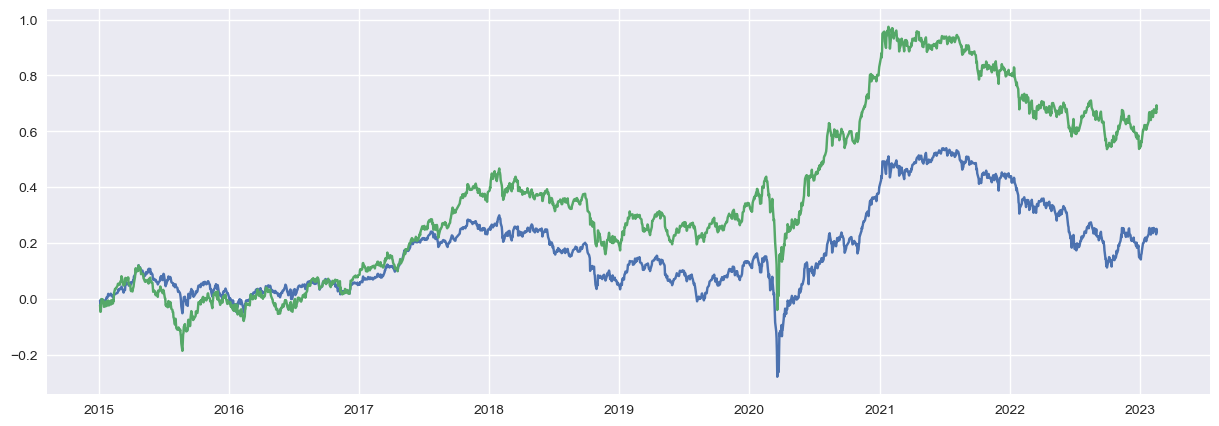

In [45]:
plt.style.use('seaborn')
plt.figure(figsize = (15,5))
plt.plot(cum_kospi)
plt.plot(cumidx)
plt.show()

#### Assignment 1-4.
1-1과 1-2에서 구한 데이터들을 DataFrame에 저장한 뒤, gzip을 활용해 저장하세요

### Assignment 2.
수업시간에 나간 Web Crawling을 활용해 다음에 답하세요

#### Assignment 2-1.
네이버 뉴스에서 '금리'를 검색하여 최근 200개의 페이지에 대한 Word Cloud를 제작하세요

#### Assignment 2-2.
저장된 텍스트 데이터를 이용해 상위 25개 어휘에 대한 어휘빈도를 ploting하여 출력하세요